In [1]:
import sys
sys.path.append("/content/drive/MyDrive/Gdrive/startup/Novus Sentry/src")
from preprocess import preprocess

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [ ]:
N = 5557
CURRENT_MULTIPLIER= 1000.0
I_load = 0.01047

In [ ]:
def insert_I_neg(I_neg):
  def current_sigmoidal_1(t, A, B, C, D, I_sd):
    I_measured = I_neg*(1.0-D*np.exp(-1.0*C/t)) -2*(I_neg*(1.0-D))*(0.5-1.0/(1.0+(np.exp(t/A)**B))) + I_sd
    return I_measured
  return current_sigmoidal_1

In [ ]:
def current_sigmoidal_2(t, A, B, C, D, I_neg, I_sd):
  I_measured = I_neg*(1.0-D*np.exp(-1.0*C/t)) -2*(I_neg*(1.0-D))*(0.5-1.0/(1.0+np.exp((t/A)**B))) - I_sd
  return I_measured

In [ ]:
def current_sigmoidal_3(t, A, B, C, D, I_neg, I_sd):
  I_measured = (I_neg-I_sd)*(1.0-D*np.exp(-1.0*C/t)) -2*((I_neg+I_sd)*(1.0-D))*(0.5-1.0/(1.0+np.exp((t/A)**B))) - I_sd
  return I_measured  

In [ ]:
def fit(input, output):
  print(input)
  input.iloc[:,1] = input.iloc[:,1] - I_load
  #N = input.iloc[:,1][input.iloc[:,1]<=0].tail(1).index.item()
  #N = (input.iloc[:,1]).abs().argsort()[:1].item()
  N = 5200
  print(N)
  i_measured = input.iloc[:N,1]*CURRENT_MULTIPLIER
  
  t = input.iloc[:N,0] -  .iloc[0,0]
  t.iloc[0] = 0.001 
  print(t)
  t_all = input.iloc[:,0] - input.iloc[0,0] 
  # t = input.iloc[:N,0]
  # t_all = input.iloc[:,0]

  # I_neg = i_measured[:5].mean()
  I_neg = i_measured.min()
  
  #f = insert_I_neg(I_neg)
  f= current_sigmoidal_3
  parameters, covariance = curve_fit(f,t, i_measured, 
                                     p0=[200.0, 0.6, 0.14, 0.9, I_neg, -0.00033*CURRENT_MULTIPLIER], 
                                     bounds=([90,0.01,0.01,0.01,-np.inf,-1.0*CURRENT_MULTIPLIER],[np.inf,1.0,1.0,1.0,0,0]),
                                     ftol=1e-12, verbose=2, max_nfev=5000)

  plt.scatter(t, i_measured,color='b',s=1)
  plt.plot(t, f(t,*parameters), color='r')
  plt.show()

  plt.scatter(t_all, (input.iloc[:,1])*CURRENT_MULTIPLIER,color='b',s=1)
  plt.plot(t_all, f(t_all,*parameters), color='r')
  plt.show()
  return parameters, covariance
  

/content/drive/MyDrive/Gdrive/startup/Novus Sentry/data/Data_v2/trial #2 (602 ohm load).xlsx
/content/drive/MyDrive/Gdrive/startup/Novus Sentry/data/Data_v2/Trial #3 (10 mA load).xlsx
       time (sec)  Current (mA)
0               1     -0.009541
1               2     -0.009209
2               3     -0.009098
3               4     -0.008806
4               5     -0.008794
...           ...           ...
11627       11628      0.010524
11628       11629      0.010572
11629       11630      0.010549
11630       11631      0.010503
11631       11632      0.010435

[11632 rows x 2 columns]
5200
0          0.001
1          1.000
2          2.000
3          3.000
4          4.000
          ...   
5195    5195.000
5196    5196.000
5197    5197.000
5198    5198.000
5199    5199.000
Name: time (sec), Length: 5200, dtype: float64
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.9060e+04                                  

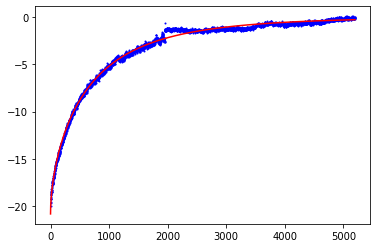

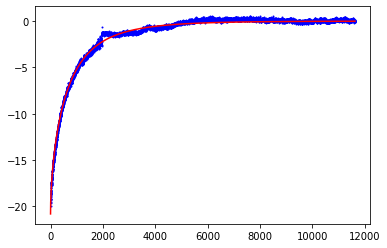

313.00161518659814 0.5705440399449176 0.010000000000000002 0.010000000000061267 -20.822536017410968 -1.3637290746061075e-16
0.09425799999999984


In [ ]:
if __name__=="__main__":
  input, output = preprocess("Data_v2")
  p, c = fit(input[0], output[0])
  print(*p)
  print((input[0].iloc[-1000:,1].mean())*CURRENT_MULTIPLIER)